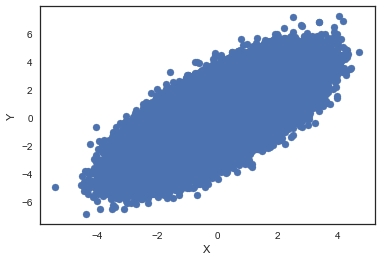

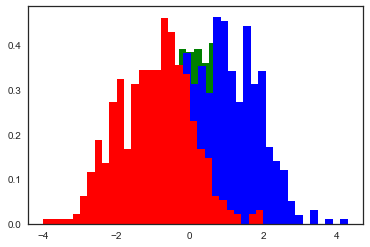

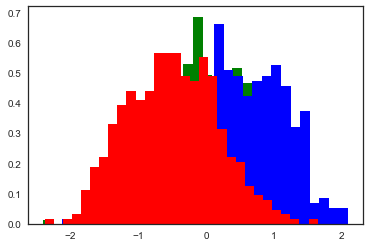

In [83]:
import numpy as np
from matplotlib import pyplot as plt
import hsic
from sklearn.svm import SVR
import pandas as pd
import matplotlib.mlab as mlab
import seaborn as sns
import seaborn as sns; sns.set(style="white", color_codes=True)





# linear

b = 0.
q = 1

X = np.random.normal(size=1000000)
N = np.random.normal(size=1000000)
Y = X + b*X**3 + np.sign(N) * np.abs(N)**q

plt.figure()
ax = plt.axes()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# x = 0 , 1 , -1
idx0  = np.argwhere(abs(X)<10**(-3))
idx1  = np.argwhere(abs(X-1)<10**(-3))
idx_1 = np.argwhere(abs(X+1)<10**(-3))

pX0CondY  = Y[idx0]
pX1CondY  = Y[idx1]
pX_1CondY = Y[idx_1]


# the histogram of the data
plt.figure()
n, bins, patches = plt.hist(pX0CondY,30, density=1,facecolor='green')
n, bins, patches = plt.hist(pX1CondY,30, density=1,facecolor='blue')
n, bins, patches = plt.hist(pX_1CondY,30, density=1,facecolor='red')


# y = 0 , 1 , -1
idx0  = np.argwhere(abs(Y)<10**(-3))
idx1  = np.argwhere(abs(Y-1)<10**(-3))
idx_1 = np.argwhere(abs(Y+1)<10**(-3))

pY0CondX  = X[idx0]
pY1CondX  = X[idx1]
pY_1CondX = X[idx_1]


# the histogram of the data
plt.figure()
n, bins, patches = plt.hist(pY0CondX,30, density=1,facecolor='green')
n, bins, patches = plt.hist(pY1CondX,30, density=1,facecolor='blue')
n, bins, patches = plt.hist(pY_1CondX,30, density=1,facecolor='red')




C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


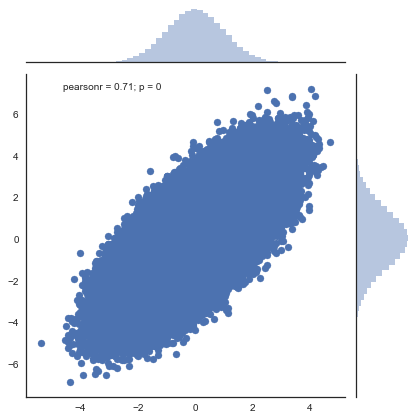

In [111]:
X = np.reshape(X,newshape=(len(X), 1))
Y = np.reshape(Y,newshape=(len(Y), 1))
XY = np.concatenate((X,Y),axis = 1)



sns.jointplot(X,Y)

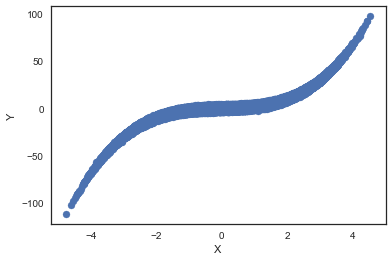

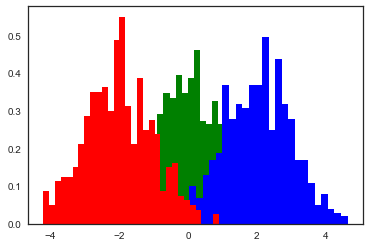

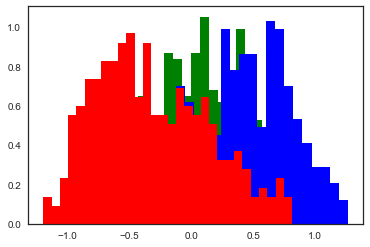

In [112]:
# non-linear
b = 1
q = 1
X = np.random.normal(size=1000000)
N = np.random.normal(size=1000000)
Y = X + b*X**3 + np.sign(N) * np.abs(N)**q

plt.figure()
ax = plt.axes()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')


# x = 0 , 1 , -1
idx0  = np.argwhere(abs(X)<10**(-3))
idx1  = np.argwhere(abs(X-1)<10**(-3))
idx_1 = np.argwhere(abs(X+1)<10**(-3))

pX0CondY  = Y[idx0]
pX1CondY  = Y[idx1]
pX_1CondY = Y[idx_1]


# the histogram of the data
plt.figure()
n, bins, patches = plt.hist(pX0CondY,30, density=1,facecolor='green')
n, bins, patches = plt.hist(pX1CondY,30, density=1,facecolor='blue')
n, bins, patches = plt.hist(pX_1CondY,30, density=1,facecolor='red')


# y = 0 , 1 , -1
idx0  = np.argwhere(abs(Y)<10**(-3))
idx1  = np.argwhere(abs(Y-1)<10**(-3))
idx_1 = np.argwhere(abs(Y+1)<10**(-3))

pY0CondX  = X[idx0]
pY1CondX  = X[idx1]
pY_1CondX = X[idx_1]


# the histogram of the data
plt.figure()
n, bins, patches = plt.hist(pY0CondX,30, density=1,facecolor='green')
n, bins, patches = plt.hist(pY1CondX,30, density=1,facecolor='blue')
n, bins, patches = plt.hist(pY_1CondX,30, density=1,facecolor='red')




C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


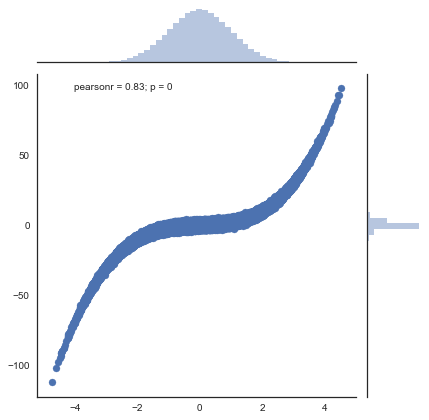

In [113]:
X = np.reshape(X,newshape=(len(X), 1))
Y = np.reshape(Y,newshape=(len(Y), 1))
XY = np.concatenate((X,Y),axis = 1)



sns.jointplot(X,Y)

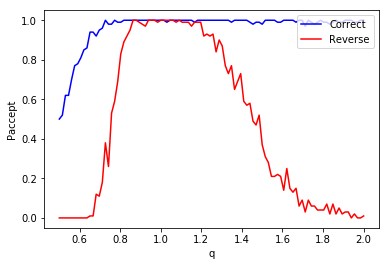

In [9]:
# linear with range of q

q_vec = np.linspace(0.5, 2.0, num=100)
clf = SVR(kernel='rbf',degree=6)

vec_correct = []
vec_reverse = []

for i in range(len(q_vec)):
    count_correct = 0
    count_reverse = 0
    
    for j in range(100):
        b = 0
        q = q_vec[i]
        X = np.random.normal(size=300)
        N = np.random.normal(size=300)
        Y = X + b*X**3 + np.sign(N) * np.abs(N)**q
        # correct
        clf.fit(X.reshape(300,1),Y)
        Y_bar = clf.predict(X.reshape(300,1)).reshape(300,1)
        residual_correct = Y_bar - Y.reshape(300,1)
        output_correct = hsic.hsic_gam(residual_correct, X.reshape(300,1),  0.02)
        indep_correct = output_correct[1]-output_correct[0]
        if indep_correct > 0:
            count_correct += 1
        # reverse
        clf.fit(Y.reshape(300,1),X)
        X_bar = clf.predict(Y.reshape(300,1)).reshape(300,1)
        residual_correct = X_bar - X.reshape(300,1)
        output_correct = hsic.hsic_gam(residual_correct, Y.reshape(300,1),  0.02)
        indep_reverse = output_correct[1]-output_correct[0]
        if indep_reverse > 0:
            count_reverse += 1 
    vec_correct.append(count_correct/100)
    vec_reverse.append(count_reverse/100)
    
plt.figure()
axis = plt.axes()
axis.plot(q_vec,vec_correct,color = 'b', label='Correct')
axis.plot(q_vec,vec_reverse,color = 'r', label='Reverse')
axis.set_xlabel('q')
axis.set_ylabel('Paccept')
axis.legend(loc='upper right')

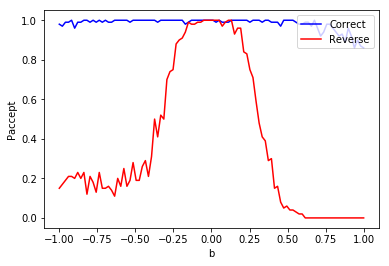

In [30]:
# Gaussian noise with range of b

b_vec = np.linspace(-1, 1, num=100)
clf = SVR(kernel='rbf',degree=6)

vec_correct = []
vec_reverse = []

for i in range(len(b_vec)):
    count_correct = 0
    count_reverse = 0
    
    for j in range(100):
        q = 1
        b = b_vec[i]
        X = np.random.normal(size=300)
        N = np.random.normal(size=300)
        Y = X + b*X**3 + np.sign(N) * np.abs(N)**q
        # correct
        clf.fit(X.reshape(300,1),Y)
        Y_bar = clf.predict(X.reshape(300,1)).reshape(300,1)
        residual_correct = Y_bar - Y.reshape(300,1)
        output_correct = hsic.hsic_gam(residual_correct, X.reshape(300,1),  0.02)
        indep_correct = output_correct[1]-output_correct[0]
        if indep_correct > 0:
            count_correct += 1
        # reverse
        clf.fit(Y.reshape(300,1),X)
        X_bar = clf.predict(Y.reshape(300,1)).reshape(300,1)
        residual_correct = X_bar - X.reshape(300,1)
        output_correct = hsic.hsic_gam(residual_correct, Y.reshape(300,1),  0.02)
        indep_reverse = output_correct[1]-output_correct[0]
        if indep_reverse > 0:
            count_reverse += 1 
    vec_correct.append(count_correct/100)
    vec_reverse.append(count_reverse/100)
    
plt.figure()
axis = plt.axes()
axis.plot(b_vec,vec_correct,color = 'b', label='Correct')
axis.plot(b_vec,vec_reverse,color = 'r', label='Reverse')
axis.set_xlabel('b')
axis.set_ylabel('Paccept')
axis.legend(loc='upper right')

(0.521355799845298, 0.7878944192763102)


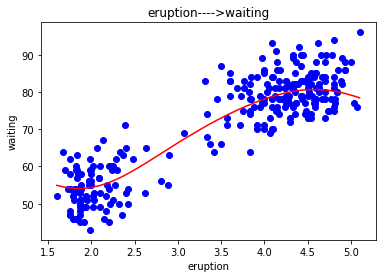

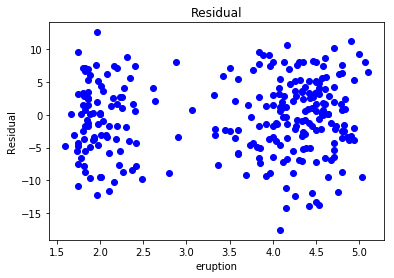

In [27]:
db = np.loadtxt('faithful.txt', skiprows=1)
eruptions = db[:,1]
waiting   = db[:,2]

# eruption(X) ---- > waiting(Y)

X = eruptions
Y = waiting

X = np.reshape(X,newshape=(len(X), 1))
Y = np.reshape(Y,newshape=(len(Y), 1))



clf = SVR(kernel='rbf')
clf.fit(X,Y.ravel())


# sorting idx for plot
idx   = np.argsort(X.ravel())
Y_bar =  clf.predict(X[idx])


plt.figure()
axis = plt.axes()
axis.scatter(X, Y,color = 'b')
axis.plot(X[idx], Y_bar, color='r')
axis.set_xlabel('eruption')
axis.set_ylabel('waiting')
axis.set_title('eruption---->waiting')

Y_bar = clf.predict(X).reshape(len(Y_bar),1)
residual = Y_bar - Y

plt.figure()
axis = plt.axes()
axis.scatter(X[idx],residual,color = 'b')
axis.set_xlabel('eruption')
axis.set_ylabel('Residual')
axis.set_title('Residual')

Output = hsic.hsic_gam(residual, X,  0.02)
print(Output)




(1.603290238583813, 0.6791149151180458)


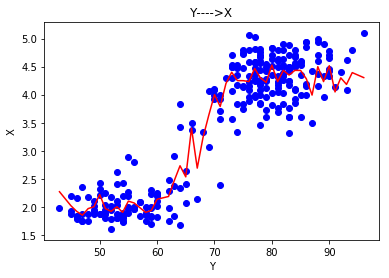

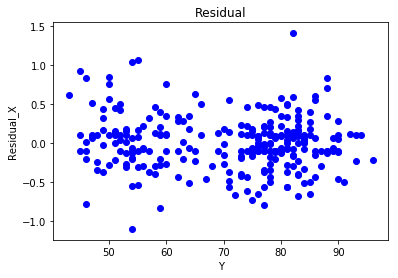

In [31]:
# waiting(Y) ---- > eruption(X)

db = np.loadtxt('faithful.txt', skiprows=1)
eruptions = db[:,1]
waiting   = db[:,2]

X = eruptions
Y = waiting

X = np.reshape(X,newshape=(len(X), 1))
Y = np.reshape(Y,newshape=(len(Y), 1))



clf = SVR(kernel='rbf')
clf.fit(Y,X.ravel())


# sorting idx for plot
idx   = np.argsort(Y.ravel())
X_bar =  clf.predict(Y[idx])


plt.figure()
axis = plt.axes()
axis.scatter(Y, X,color = 'b')
axis.plot(Y[idx], X_bar, color='r')
axis.set_xlabel('Y')
axis.set_ylabel('X')
axis.set_title('Y---->X')

X_bar = clf.predict(Y).reshape(len(X_bar),1)
residual = X_bar - X

plt.figure()
axis = plt.axes()
axis.scatter(Y[idx],residual,color = 'b')
axis.set_xlabel('Y')
axis.set_ylabel('Residual_X')
axis.set_title('Residual')

Output = hsic.hsic_gam(residual, Y,  0.02)
print(Output)


(3.751905633783353, 0.6332036484250128)


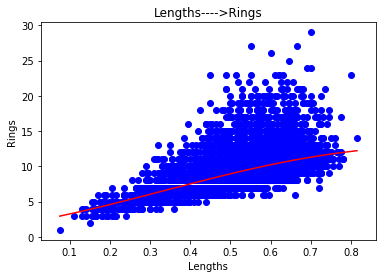

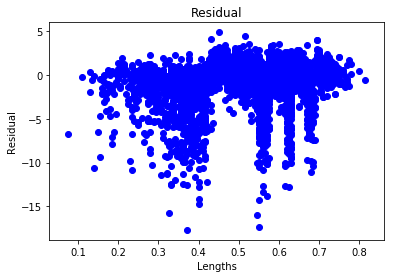

In [33]:
data = pd.read_csv('abalone.txt',header=0)
Lengths = np.array(data['c2'])
Rings   = np.array(data['c9'])

X = Lengths 
Y = Rings

X = np.reshape(X,newshape=(len(X), 1))
Y = np.reshape(Y,newshape=(len(Y), 1))


clf = SVR(kernel='rbf')
clf.fit(X,Y.ravel())


# sorting idx for plot
idx   = np.argsort(X.ravel())
Y_bar =  clf.predict(X[idx])


plt.figure()
axis = plt.axes()
axis.scatter(X, Y,color = 'b')
axis.plot(X[idx], Y_bar, color='r')
axis.set_xlabel('Lengths')
axis.set_ylabel('Rings')
axis.set_title('Lengths---->Rings')

Y_bar = clf.predict(X).reshape(len(Y_bar),1)
residual = Y_bar - Y 

plt.figure()
axis = plt.axes()
axis.scatter(X[idx],residual,color = 'b')
axis.set_xlabel('Lengths')
axis.set_ylabel('Residual')
axis.set_title('Residual')

Output = hsic.hsic_gam(residual, X,  0.02)
print(Output)

(5.056089769114091, 0.6223666073811343)


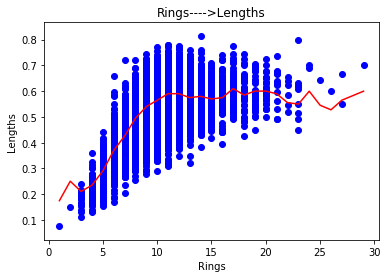

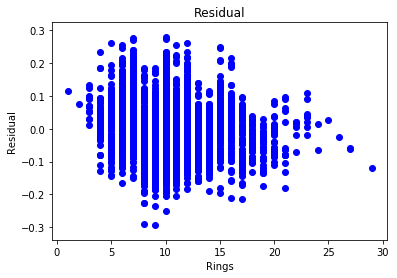

In [34]:
data = pd.read_csv('abalone.txt',header=0)
Lengths = np.array(data['c2'])
Rings   = np.array(data['c9'])

X = Lengths 
Y = Rings

X = np.reshape(X,newshape=(len(X), 1))
Y = np.reshape(Y,newshape=(len(Y), 1))



clf = SVR(kernel='rbf')
clf.fit(Y,X.ravel())


# sorting idx for plot
idx   = np.argsort(Y.ravel())
X_bar =  clf.predict(Y[idx])


plt.figure()
axis = plt.axes()
axis.scatter(Y, X,color = 'b')
axis.plot(Y[idx], X_bar, color='r')
axis.set_xlabel('Rings')
axis.set_ylabel('Lengths')
axis.set_title('Rings---->Lengths')

X_bar = clf.predict(Y).reshape(len(X_bar),1)
residual = X_bar - X

plt.figure()
axis = plt.axes()
axis.scatter(Y[idx],residual,color = 'b')
axis.set_xlabel('Rings')
axis.set_ylabel('Residual')
axis.set_title('Residual')

Output = hsic.hsic_gam(residual,Y ,  0.02)
print(Output)
